# Mathematik für Biologiestudierende II

Sommersemester 2025

29.04.2025

&copy; 2025 Prof. Dr. Rüdiger W. Braun 

In [1]:
import numpy as np
np.set_printoptions(legacy='1.21')
import pandas as pd
from scipy import stats
import seaborn as sns
sns.set_theme()

# Themen

* Verteilung und Verteilungsfunktion
* Prinzip der ANOVA
* Heteroskedastizität
* Levene-Test
* Alexander-Govern-Test

# Wiederholung:  Verteilung und Verteilungsfunktion

## diskrete Verteilungen

* Wir kennen nur eine diskrete Verteilung, nämlich die Binomialverteilung
* Beispiel Binomialverteilung 
$$
    B_{n,p}(k) = \begin{pmatrix} n \\ k \end{pmatrix} p^k (1-p)^{n-k}
$$

In [2]:
P = stats.binom(22, 0.34)

an eine diskrete Verteilung haben wir zwei Typen von Fragen:

(1) Was ist der Wert der Verteilung für ein bestimmtes $k$  (Lektion 5)

In [3]:
P.pmf(7)

0.17593323858999418

`pmf` probabiliy mass distribution

Das können wir auch zu Fuß ausrechnen

In [4]:
from scipy import special
special.binom(22, 7) * 0.34**7 * (1-0.34)**15

0.17593323858999396

In [5]:
0.17593323858999418 / 0.17593323858999396

1.0000000000000013

(2) Was ist der Wert der Verteilungsfunktion   (Lektion 8)

In [6]:
P.cdf(7)

0.5133586582890823

`P.cdf` cumulative distribution function

Das ist zu Fuß schon ziemlich umständlich:

In [7]:
P.pmf(0) + P.pmf(1) + P.pmf(2) + P.pmf(3) + P.pmf(4) + P.pmf(5) + P.pmf(6) + P.pmf(7)

0.513358658289081

## kontinuierliche Verteilungen

wir kennen drei kontinuierliche Verteilungen

* Normalverteilung `stats.norm`
* $t$-Verteilung `stats.t`
* $F$-Verteilung `stats.f`

Beispiel Normalverteilung:

In [8]:
P = stats.norm(22.4, 7.2)

für uns wichtig ist nur die Frage nach der Verteilungsfunktion

In [9]:
P.cdf(22.9)

0.5276820736327322

# Was hat ANOVA mit Varianzen bzw. Stichprobenstreuungen zu tun?

ANOVA:  "Analysis of Variance"

Wir gehen zurück zum Beispiel Schadstoffkonzentration

In [10]:
u_schad = "https://www.math.uni-duesseldorf.de/~braun/bio2324/data/schadstoffe.csv"
df = pd.read_csv(u_schad, index_col=0)
df.head()

,Messstelle,Konzentration
0,5,0.000867
1,3,0.000490
2,1,0.000589
3,1,0.000950
4,4,0.001152


In [11]:
g1 = df[df.Messstelle==1].Konzentration
g2 = df[df.Messstelle==2].Konzentration
g3 = df[df.Messstelle==3].Konzentration
g4 = df[df.Messstelle==4].Konzentration
g5 = df[df.Messstelle==5].Konzentration

In [12]:
df.Konzentration.std()

0.00034083567416156316

In [13]:
g1.std()

0.0003088278193577403

In [14]:
g2.std()

0.0004360906113112883

In [15]:
g3.std()

0.00033459177573784817

In [16]:
g4.std()

0.00032047637643428304

In [17]:
g5.std()

0.0003095504974203532

Die Stichprobenstreuung des gesamten Datensatzes ist ungefähr dieselbe wie die jeder einzelnen Gruppe

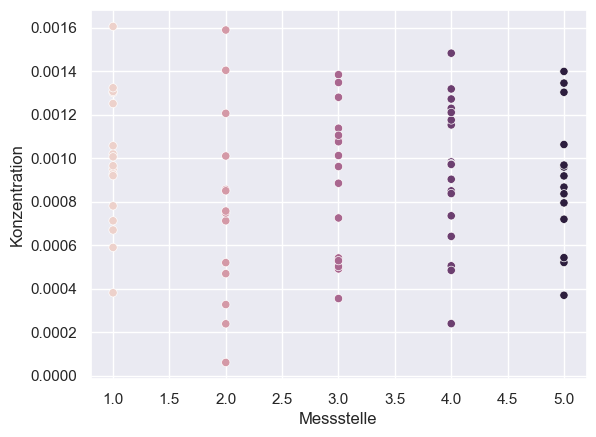

In [18]:
sns.scatterplot(df, y='Konzentration', x='Messstelle', hue='Messstelle', legend=False);

Jetzt dasselbe mit den Pinguinen

In [19]:
df = sns.load_dataset("penguins")


In [20]:
gA = df[df.species=='Adelie'].bill_length_mm.dropna()
gG = df[df.species=='Gentoo'].bill_length_mm.dropna()
gC = df[df.species=='Chinstrap'].bill_length_mm.dropna()

In [21]:
df.bill_length_mm.std()

5.4595837139265315

In [22]:
gA.std()

2.663404848368619

In [23]:
gG.std()

3.081857372114287

In [24]:
gC.std()

3.3392558959358865

* Die Stichprobenstreuung im gesamten Datensatz ist größer als in den einzelnen Gruppen.  
* Der Unterschied kommt daher, dass sich die Gruppenmittelwerte stärker unterscheiden, als sich das durch Variation innerhalb der Gruppen erklären lässt

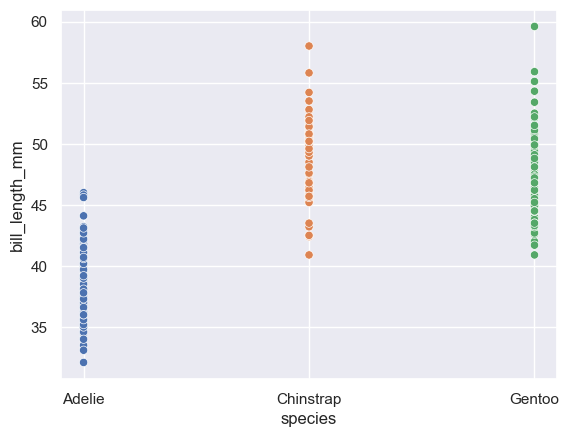

In [25]:
sns.scatterplot(df, y='bill_length_mm', x='species', hue='species', legend=False);

In der tatsächlich benutzen Formel kommt anstelle der Stichprobenstreuung die Varianz vor, daher der Name "Analysis of Varianz"

# Heteroskedastizität

* Die ANOVA vergleicht die Varianzen innerhalb der einzelnen Gruppen mit der Varianz im gesamten Datensatz, um die Unterschiede zwischen den Gruppen zu untersuchen
* À priori geht das erstmal nur, wenn die Varianzen innerhalb der Gruppen gleich sind

* Ein Datensatz ist *heteroskedastisch*, wenn die verschiedenen Gruppen unterschiedliche Varianz haben
* Sonst ist er *homoskedastisch*

# Der Levene-Test

Der Levene-Test testet auf Gleichheit der Varianzen

Drei verschiedene Lehrmethoden werden angewandt.  Die Ergebnisse der Probandinnen und Probanden im Abschlusstest werden verglichen.  Führen verschiedene Lehrmethoden zu unterschiedlichen Ergebnissen?

In [26]:
dfa = pd.DataFrame()
dfb = pd.DataFrame()
dfc = pd.DataFrame()

In [27]:
dfa['A'] = [42, 115, 73, 58, 64, 100, 112, 112, 52, 70,
    152, 215, 176, 97, 145, 100, 82, 94, 165, 97]

dfb['B'] = [165, 165, 152, 173, 225, 173, 136, 145, 188, 155,
    197, 233, 236, 264, 200, 252, 258, 212, 145, 273]

dfc['C'] = [236, 185, 339, 255, 264, 325, 267, 215, 233, 295,
    255, 264, 224, 245, 248, 309, 264, 273, 294, 230]

Test auf Heteroskedastizität

In [28]:
stats.levene(dfa.A, dfb.B, dfc.C)

LeveneResult(statistic=0.6457341109631508, pvalue=0.5280694573759905)

* Der p-Wert ist 0.53.  Hetereskedastizizät kann nicht nachgewiesen werden.

* Wir fahren mit der ANOVA fort

In [29]:
stats.f_oneway(dfa.A, dfb.B, dfc.C)

F_onewayResult(statistic=67.41573785674242, pvalue=9.532727011700098e-16)

### Beispiel: Barsche

Es werden Barsche gleichen Alters verglichen

In [30]:
df = pd.read_csv('barsche.csv')
df.head()

,Art,Länge
0,gestreift,9.890006
1,gestreift,9.343944
2,gestreift,9.867069
3,gestreift,10.302781
4,gestreift,10.066964


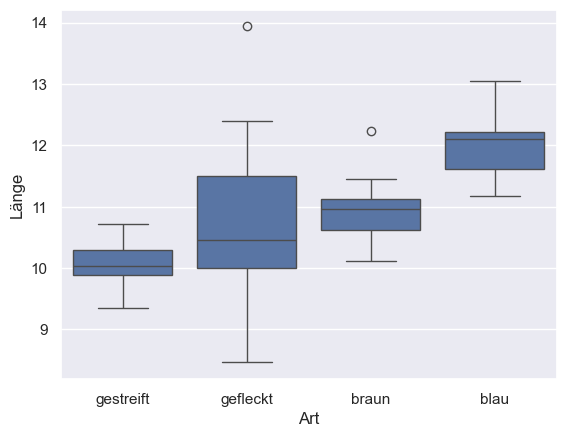

In [31]:
sns.boxplot(data=df, x="Art", y="Länge");

Sieht heteroskedastisch aus.  

In [32]:
ds = df[df.Art=='gestreift'].Länge
dl = df[df.Art=='gefleckt'].Länge
db = df[df.Art=='blau'].Länge
dr = df[df.Art=='braun'].Länge

In [33]:
stats.levene(ds, dl, dr, db)

LeveneResult(statistic=13.459492972830807, pvalue=1.3472893996510424e-07)

# Probleme beim Test auf Heteroskedastizität

* Die Nullhypothese beim Levene-Test ist 

> $H_0$:  Die Daten sind homoskedastisch

* Ein Hypothesentest "beweist" nie die Nullhypothese
  * bei starken Indizien dagegen lehnt er sie ab
  * bei starken Indizien dafür behält er sie bei
  * bei unklaren Indizien behält er sie auch bei 

* um zu erkennen, ob der Levene-Test Heteroskedastizität überhaupt erkennen kann, wäre eine Poweranalyse für den Levene-Test nötig, das ist aber unrealistisch

* auch das andere Extrem ist möglich:  Der Stichprobenumfang ist so groß, dass kleine Unterschiede schon signifikant werden

👁️eyeballing (scharfes Hinsehen)

# Alexander-Govern-Test

Wenn die Daten heteroskedastisch, aber normalverteilt sind, dann rechnet man einen Alexander-Govern-Test

In [34]:
stats.alexandergovern(ds, dl, dr, db)

AlexanderGovernResult(statistic=113.40810114676775, pvalue=2.02668339537414e-24)

Im homoskedastischen Fall ist der p-Wert des Alexander-Govern-Tests meist schlechter als der von `f_oneway`

In [35]:
stats.alexandergovern(dfa.A, dfb.B, dfc.C)

AlexanderGovernResult(statistic=56.825380493158306, pvalue=4.576415099851176e-13)

In [36]:
stats.f_oneway(dfa.A, dfb.B, dfc.C)

F_onewayResult(statistic=67.41573785674242, pvalue=9.532727011700098e-16)